# **Machine Learning with XAI-Based Water Quality Assessment**

Access to clean water is essential for human health, agriculture, and the sustainability of ecosystems. However, water contamination remains a persistent environmental and public health challenge. Conventional water quality assessment methods often rely on manual sampling and laboratory testing, which are resource-intensive, costly, and conducted at limited intervals.

To promote transparency and trust, the system incorporates explainable AI (XAI) approaches such as SHAP (SHapley Additive exPlanations) and feature importance plots, allowing stakeholders to understand the rationale behind each prediction. A user-friendly Streamlit web application has been developed to provide real-time access to predictions and explanations, enabling informed decision-making for researchers, environmental agencies, and the public.

**Content:**

The water_potability.csv file (https://www.kaggle.com/datasets/adityakadiwal/water-potability) contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.



In [508]:
# import relevant libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVR
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import shap

import warnings
warnings.filterwarnings("ignore")

## 1. Data Exploration

In [509]:
# load the dataset
water_df = pd.read_csv("dataset/water_potability.csv")
# read the first five rows
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# print the data information
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [511]:
# rename the columns 
water_df.rename(columns = {'ph': 'pH', 
                           'Hardness': 'hardness', 
                           'Solids': 'total_dissolved_solids', 
                           'Chloramines': 'chloramines', 
                           'Sulfate': 'sulfate', 
                           'Conductivity': 'conductivity', 
                           'Organic_carbon': 'organic_carbon', 
                           'Trihalomethanes': 'trihalomethanes', 
                           'Turbidity': 'turbidity', 
                           'Potability': 'potability'}, inplace = True)
water_df.head()

,pH,hardness,total_dissolved_solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [512]:
# count the number of missing values for each feature
water_df.isnull().sum()

pH                        491
hardness                    0
total_dissolved_solids      0
chloramines                 0
sulfate                   781
conductivity                0
organic_carbon              0
trihalomethanes           162
turbidity                   0
potability                  0
dtype: int64

In [513]:
# remove the rows with missing values 
#water_df.dropna(inplace = True)

In [514]:
# re-count the number of missing values for each feature
#water_df.isnull().sum()

In [515]:
# check for duplicated rows 
water_df.duplicated().sum()

np.int64(0)

In [516]:
# print the data info 
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pH                      2785 non-null   float64
 1   hardness                3276 non-null   float64
 2   total_dissolved_solids  3276 non-null   float64
 3   chloramines             3276 non-null   float64
 4   sulfate                 2495 non-null   float64
 5   conductivity            3276 non-null   float64
 6   organic_carbon          3276 non-null   float64
 7   trihalomethanes         3114 non-null   float64
 8   turbidity               3276 non-null   float64
 9   potability              3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [517]:
# display the first five rows 
water_df.head()

,pH,hardness,total_dissolved_solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [518]:
# change the classification values 
water_df['potability'] = water_df['potability'].map({0: 'not_potable', 1: 'potable'})

In [519]:
# display the first five rows 
water_df.head()

,pH,hardness,total_dissolved_solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,not_potable
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,not_potable
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,not_potable
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,not_potable
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,not_potable


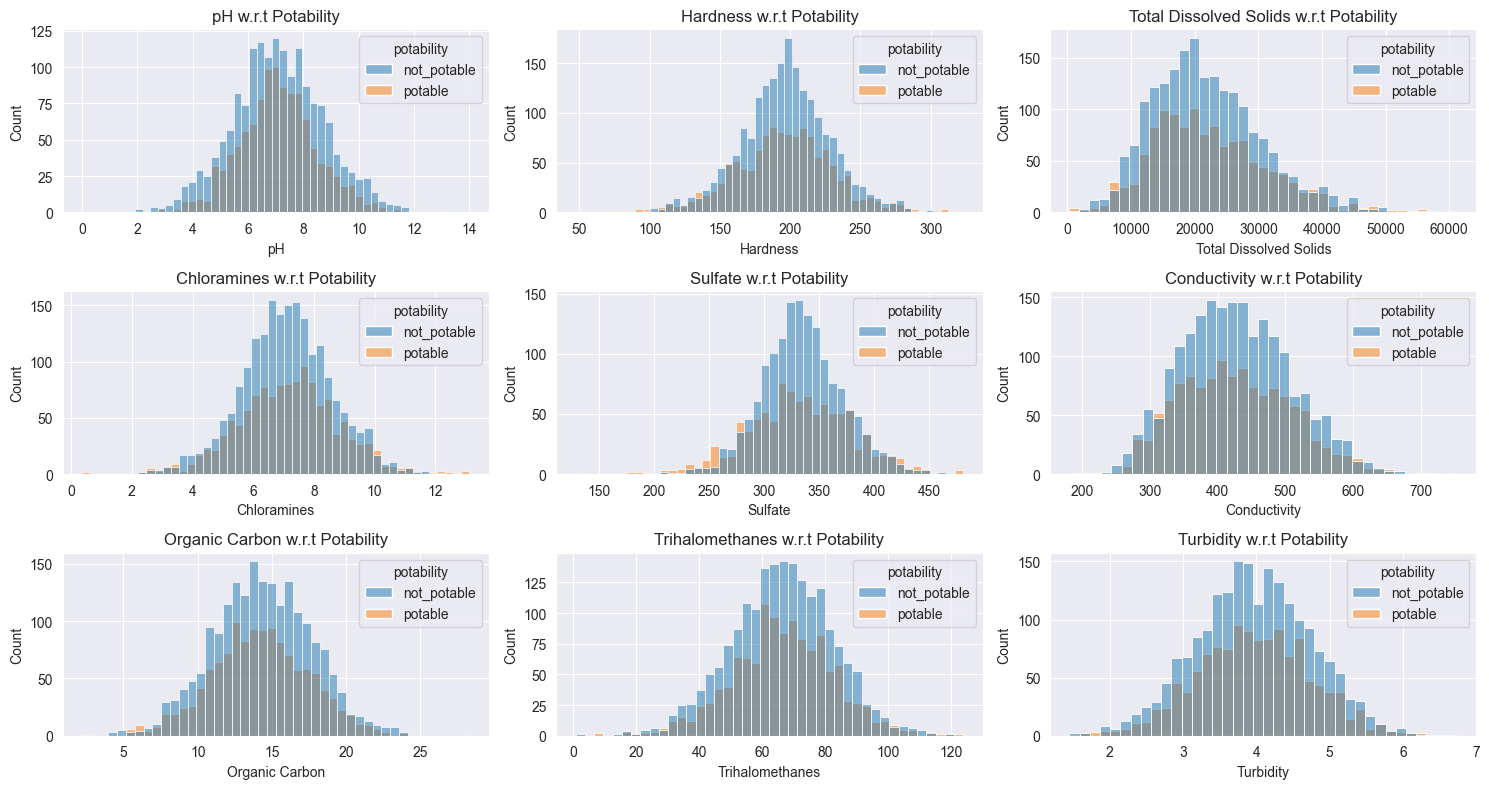

In [520]:
# visualize the distribution of the numerical features with respect to potability feature 
plt.figure(figsize = (15, 8))
sns.set_style("darkgrid")
plt.subplot(3, 3, 1)
sns.histplot(x = "pH", hue = "potability", data = water_df)
plt.title("pH w.r.t Potability")
plt.xlabel("pH")

plt.subplot(3, 3, 2)
sns.histplot(x = "hardness", hue = "potability", data = water_df)
plt.title("Hardness w.r.t Potability")
plt.xlabel("Hardness")

plt.subplot(3, 3, 3)
sns.histplot(x = "total_dissolved_solids", hue = "potability", data = water_df)
plt.title("Total Dissolved Solids w.r.t Potability")
plt.xlabel("Total Dissolved Solids")

plt.subplot(3, 3, 4)
sns.histplot(x = "chloramines", hue = "potability", data = water_df)
plt.title("Chloramines w.r.t Potability")
plt.xlabel("Chloramines")

plt.subplot(3, 3, 5)
sns.histplot(x = "sulfate", hue = "potability", data = water_df)
plt.title("Sulfate w.r.t Potability")
plt.xlabel("Sulfate")

plt.subplot(3, 3, 6)
sns.histplot(x = "conductivity", hue = "potability", data = water_df)
plt.title("Conductivity w.r.t Potability")
plt.xlabel("Conductivity")

plt.subplot(3, 3, 7)
sns.histplot(x = "organic_carbon", hue = "potability", data = water_df)
plt.title("Organic Carbon w.r.t Potability")
plt.xlabel("Organic Carbon")

plt.subplot(3, 3, 8)
sns.histplot(x = "trihalomethanes", hue = "potability", data = water_df)
plt.title("Trihalomethanes w.r.t Potability")
plt.xlabel("Trihalomethanes")

plt.subplot(3, 3, 9)
sns.histplot(x = "turbidity", hue = "potability", data = water_df)
plt.title("Turbidity w.r.t Potability")
plt.xlabel("Turbidity")

plt.tight_layout()
plt.show()


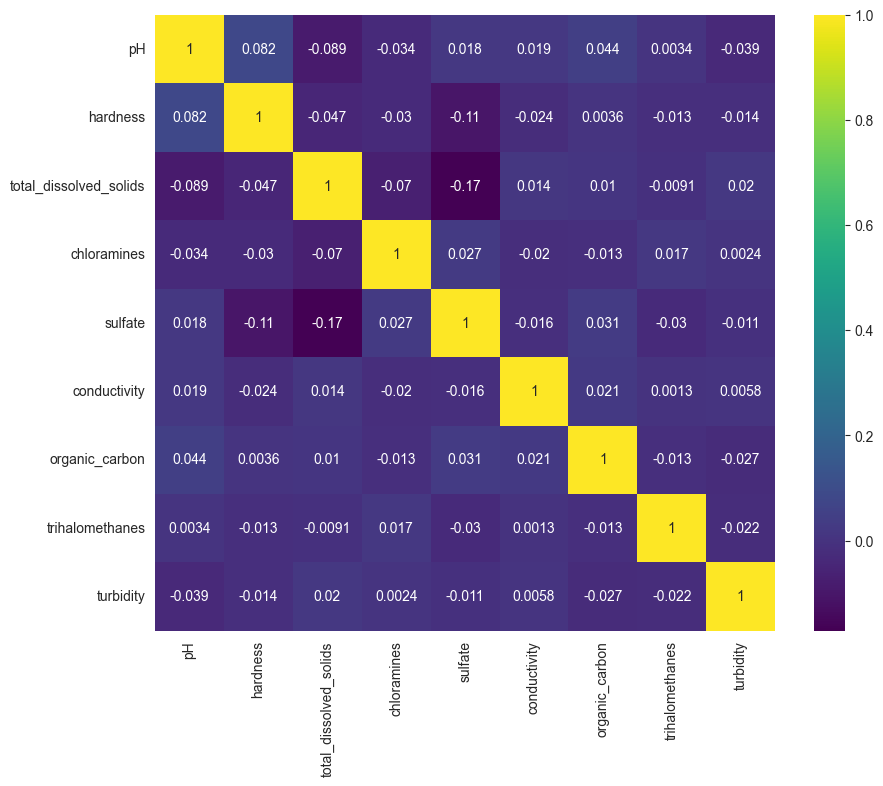

In [ ]:
# create a common relationship diagram (correlatio matrix)
plt.figure(figsize = (10, 8))
sns.heatmap(water_df.drop(['potability'], axis = 1).corr(), annot = True, cmap = "viridis")
plt.show()

## 2. Fill the Null/ Missing Values with KNN Imputer

In [522]:
X_col = water_df.drop(['potability'], axis = 1).columns
imputer = KNNImputer(n_neighbors = 5)
water_df[X_col] = imputer.fit_transform(water_df.drop(['potability'], axis = 1))

In [523]:
water_df.isnull().sum()

pH                        0
hardness                  0
total_dissolved_solids    0
chloramines               0
sulfate                   0
conductivity              0
organic_carbon            0
trihalomethanes           0
turbidity                 0
potability                0
dtype: int64

## 3. Feature Selection using Decision Tree Classifier

In [524]:
# extract the feature names
X_col = water_df.drop(['potability'], axis = 1).columns
X_col

Index(['pH', 'hardness', 'total_dissolved_solids', 'chloramines', 'sulfate',
       'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity'],
      dtype='object')

In [525]:
# split the data into X and y 
X_dtc = water_df[X_col]
y_dtc = water_df['potability']

In [526]:
# build decision trees classifier
dtc = DecisionTreeClassifier(random_state = 2025)
dtc.fit(X_dtc, y_dtc)

DecisionTreeClassifier(random_state=2025)

In [527]:
# extract the feature importances 
dtc_feature_importance = dtc.feature_importances_
dtc_feature_importance

array([0.13638478, 0.13672967, 0.10135619, 0.1205685 , 0.1529233 ,
       0.08882312, 0.07656173, 0.09971437, 0.08693834])

In [528]:
# store the feature importances and feature name into a dataframe 
dtc_feature_importance_dict = {'feature': X_col, 
                               'feature importance': dtc_feature_importance}
dtc_feature_importance_df = pd.DataFrame(dtc_feature_importance_dict)

# sort the feature importance by descending order
dtc_feature_importance_df_sorted = dtc_feature_importance_df.sort_values(by = 'feature importance', ascending = False)
dtc_feature_importance_df_sorted

,feature,feature importance
4,sulfate,0.152923
1,hardness,0.136730
0,pH,0.136385
3,chloramines,0.120569
2,total_dissolved_solids,0.101356
7,trihalomethanes,0.099714
5,conductivity,0.088823
8,turbidity,0.086938
6,organic_carbon,0.076562


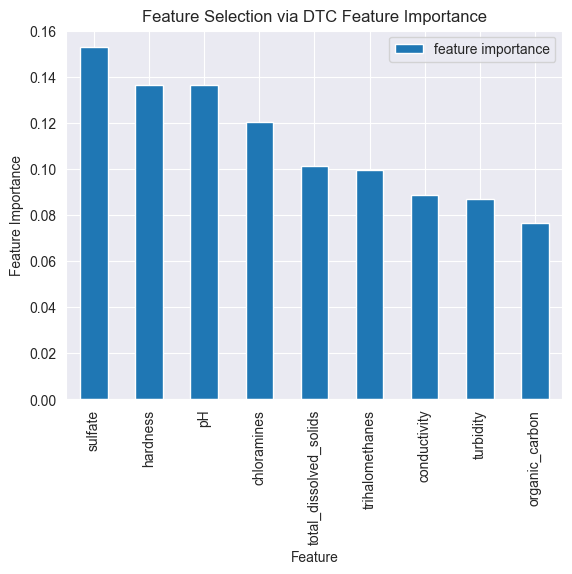

In [529]:
# plot the feature importance 
sns.set_style("darkgrid")
dtc_feature_importance_df_sorted.plot(x = "feature", y = "feature importance", kind = "bar")
plt.title("Feature Selection via DTC Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

In [530]:
# select the features that are beneficial to the ML models
water_df = water_df.drop(columns = ['organic_carbon', 'turbidity', 'conductivity', 'trihalomethanes', 'total_dissolved_solids'], axis = 1)

## 4. Data Resampling using SMOTETomek

In [531]:
X_col = water_df.drop(['potability'], axis = 1).columns

In [532]:
# class distribution before resampling 
water_df['potability'].value_counts()

potability
not_potable    1998
potable        1278
Name: count, dtype: int64

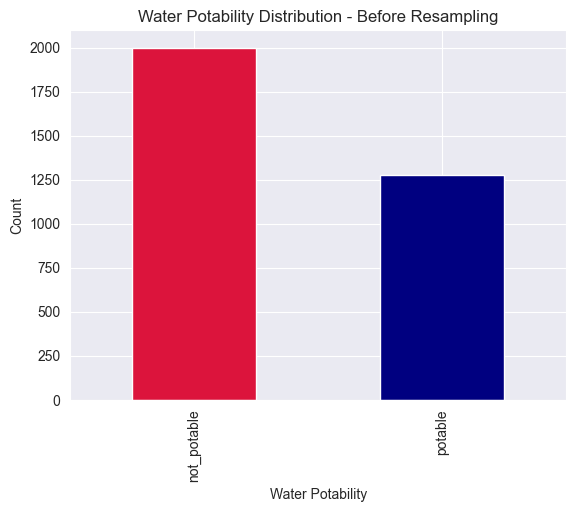

In [533]:
# visualization of class distribution 

sns.set_style("darkgrid")
water_df['potability'].value_counts().plot(kind = "bar", color = ['crimson', 'navy'])
plt.title("Water Potability Distribution - Before Resampling")
plt.xlabel("Water Potability")
plt.ylabel("Count")
plt.show()

In [534]:
# apply resampling technique 
smt= SMOTEENN(random_state = 2025)
water_df_X, water_df_y = smt.fit_resample(water_df[X_col], water_df['potability'])

In [535]:
smt2 = SMOTETomek(random_state = 2025)
water_df_X, water_df_y = smt2.fit_resample(water_df_X[X_col], water_df_y)

In [536]:
water_df_y.value_counts()

potability
not_potable    764
potable        764
Name: count, dtype: int64

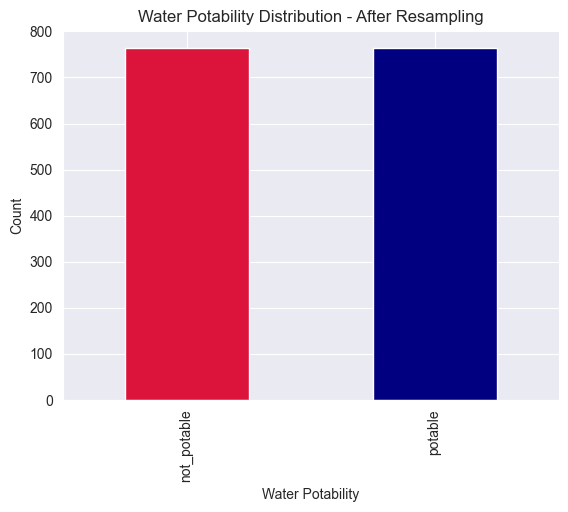

In [537]:
# visualization of class distribution 

sns.set_style("darkgrid")
water_df_y.value_counts().plot(kind = "bar", color = ['crimson', 'navy'])
plt.title("Water Potability Distribution - After Resampling")
plt.xlabel("Water Potability")
plt.ylabel("Count")
plt.show()

## 5. Data Splitting

In [538]:
# split the dataset into 70% training, 15% testing and 15% calibration testing
X_train, X_test, y_train, y_test = train_test_split(water_df_X, 
                                                    water_df_y, 
                                                    test_size = 0.2, 
                                                    shuffle = True, 
                                                    random_state = 2025,
                                                    stratify = water_df_y)


## 6. Data Normalization

In [539]:
# apply normalization 
scaler = StandardScaler()
X_train[X_col] = scaler.fit_transform(X_train[X_col])
X_test[X_col] = scaler.transform(X_test[X_col])

In [540]:
# view the standardized train data
X_train.head()

,pH,hardness,chloramines,sulfate
1127,0.306810,0.535374,-0.087104,0.115199
309,1.983059,-1.104261,-0.685630,1.803587
834,0.828863,0.384199,-0.605356,-2.510207
820,0.395139,0.281390,0.008746,-0.702765
308,-1.515146,-0.350740,0.210957,0.468532


In [541]:
# view the standardized test data
X_test.head()

,pH,hardness,chloramines,sulfate
514,0.796000,-0.888447,2.174384,-2.313889
126,-0.907472,-0.504192,-0.626338,-0.716300
1411,-0.896195,0.997657,0.468032,-1.320887
1432,0.818579,0.023055,0.120376,0.216726
1178,-0.314595,-0.145215,-0.438289,1.175184


## 7. Fine Tune and Evaluate ML Models

In [542]:
# initialize CV
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2025)

### (A) Random Forest Classifier

In [543]:
# set params 
rfc_params = {'n_estimators': np.arange(10, 110, 10), 
              'criterion': ['gini', 'entropy', 'log_loss'],
              'min_samples_split': [2, 3, 4, 5], 
              'min_samples_leaf': [2, 3, 4, 5]}

# set grid search params
rfc_gs = GridSearchCV(estimator = RandomForestClassifier(random_state = 2025), 
                      param_grid = rfc_params, 
                      cv = cv, 
                      return_train_score = True, 
                      scoring = "accuracy", 
                      verbose = 3)

# fit the classifier
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV 1/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.982, test=0.865) total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.980, test=0.829) total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.979, test=0.807) total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.985, test=0.881) total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.983, test=0.865) total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=(train=0.992, test=0.869) total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=(train=0

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=RandomForestClassifier(random_state=2025),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             return_train_score=True, scoring='accuracy', verbose=3)

In [544]:
# display the best params and scores
print("The best hyperparameters: {}".format(rfc_gs.best_estimator_))
print("The best score: {:.4f}".format(rfc_gs.best_score_))

The best hyperparameters: RandomForestClassifier(min_samples_leaf=2, n_estimators=np.int64(30),
                       random_state=2025)
The best score: 0.8601


#### (i) Classification Report

In [545]:
# perform prediction on test data
rfc_test_pred = rfc_gs.predict(X_test)

In [546]:
# display classification report
print(classification_report(y_test, rfc_test_pred))

              precision    recall  f1-score   support

 not_potable       0.88      0.88      0.88       153
     potable       0.88      0.88      0.88       153

    accuracy                           0.88       306
   macro avg       0.88      0.88      0.88       306
weighted avg       0.88      0.88      0.88       306



#### (ii) Confusion Matrix

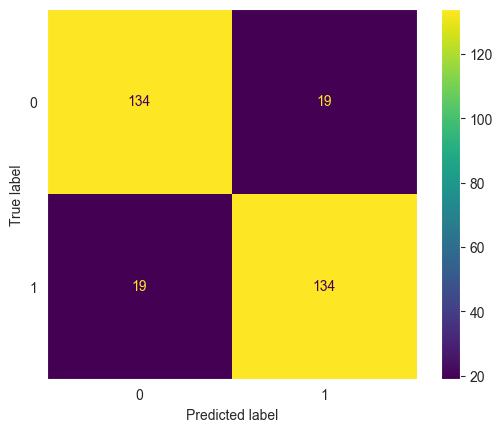

In [547]:
# display confusion matrix 
rfc_cm = confusion_matrix(y_test, rfc_test_pred)
rfc_cmPlot = ConfusionMatrixDisplay(rfc_cm)
rfc_cmPlot.plot()
plt.grid(False)
plt.show()

#### (iii) AUC-ROC Curve

In [548]:
# roc curve
rfc_prob = rfc_gs.predict_proba(X_test)[:, 1]
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_prob, pos_label = "potable")

In [549]:
# roc score
y_test_num = np.where(y_test == "potable", 1, 0)
rfc_test_pred_num = np.where(rfc_test_pred == "potable", 1, 0)
rfc_roc_score = roc_auc_score(y_test_num, rfc_test_pred_num)

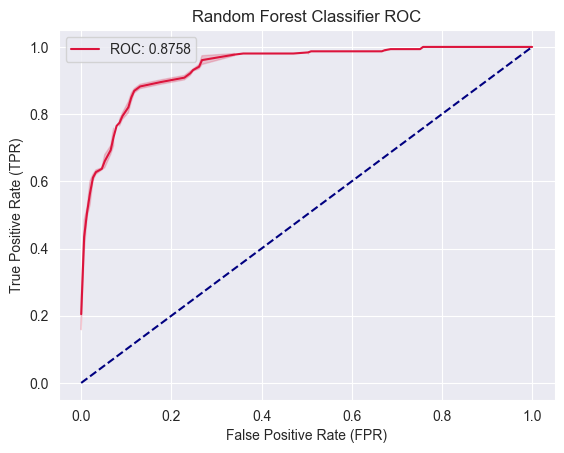

In [550]:
# plot roc curve
sns.lineplot(x = rfc_fpr, y = rfc_tpr, color = "crimson", label = "ROC: {:.4f}".format(rfc_roc_score))
sns.lineplot(x = [0, 1], y = [0, 1], color = "navy", linestyle = "--")
plt.title("Random Forest Classifier ROC")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

#### (iv) SHAP Explainability

In [551]:
explainer_rfc = shap.Explainer(rfc_gs.best_estimator_, X_train)
shap_values_rfc = explainer_rfc(X_train)

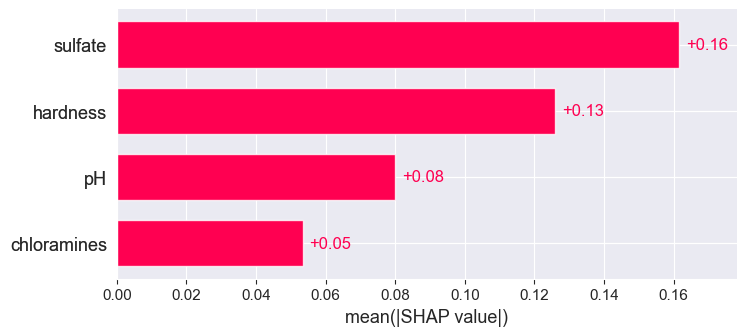

In [552]:
shap.plots.bar(shap_values_rfc[:, :, 1])

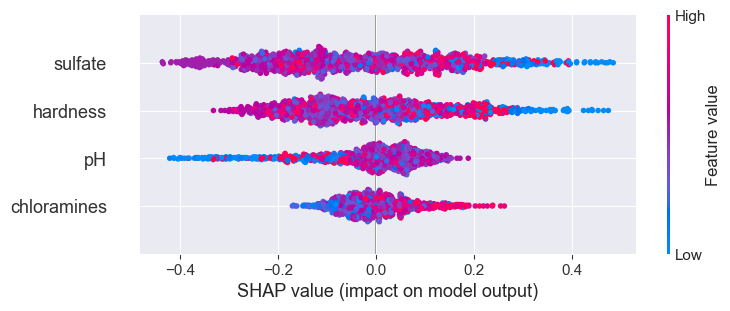

In [553]:
shap.plots.beeswarm(shap_values_rfc[:, :, 1])

### (B) Extra Tree Classifier

In [ ]:
# set params 
etc_params = {'n_estimators': np.arange(10, 110, 10), 
              'criterion': ['gini', 'entropy', 'log_loss'],
              'min_samples_split': [2, 3, 4, 5], 
              'min_samples_leaf': [2, 3, 4, 5]}

# set grid search params
etc_gs = GridSearchCV(estimator = ExtraTreesClassifier(random_state = 2025), 
                      param_grid = etc_params, 
                      cv = cv, 
                      return_train_score = True, 
                      scoring = "accuracy", 
                      verbose = 3)
 
# fit the classifier
etc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV 1/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.984, test=0.776) total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.985, test=0.792) total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.990, test=0.750) total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.986, test=0.869) total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.985, test=0.889) total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=(train=0.996, test=0.824) total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=(train=0

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=ExtraTreesClassifier(random_state=2025),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# display the best params and scores
print("The best hyperparameters: {}".format(etc_gs.best_estimator_))
print("The best score: {:.4f}".format(etc_gs.best_score_))

The best hyperparameters: ExtraTreesClassifier(criterion='entropy', min_samples_leaf=2,
                     n_estimators=np.int64(70), random_state=2025)
The best score: 0.8584


#### (i) Classification Report

In [ ]:
# perform prediction on test data
etc_test_pred = etc_gs.predict(X_test)

In [ ]:
# display classification report
print(classification_report(y_test, etc_test_pred))

              precision    recall  f1-score   support

 not_potable       0.89      0.88      0.88       153
     potable       0.88      0.89      0.88       153

    accuracy                           0.88       306
   macro avg       0.88      0.88      0.88       306
weighted avg       0.88      0.88      0.88       306



#### (ii) Confusion Matrix

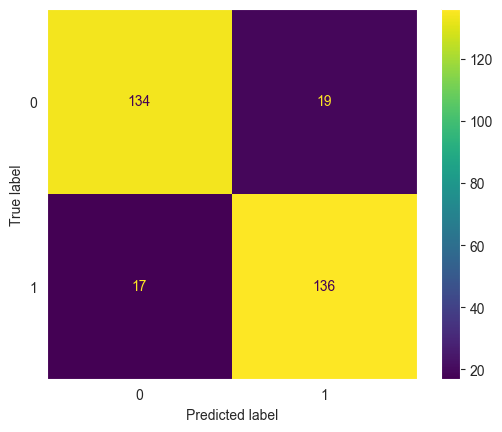

In [ ]:
# display confusion matrix 
etc_cm = confusion_matrix(y_test, etc_test_pred)
etc_cmPlot = ConfusionMatrixDisplay(etc_cm)
etc_cmPlot.plot()
plt.grid(False)
plt.show()

#### (iii) AUC-ROC Curve

In [ ]:
# roc curve
etc_prob = etc_gs.predict_proba(X_test)[:, 1]
etc_fpr, etc_tpr, etc_thresholds = roc_curve(y_test, etc_prob, pos_label = "potable")

In [ ]:
# roc score
y_test_num = np.where(y_test == "potable", 1, 0)
etc_test_pred_num = np.where(etc_test_pred == "potable", 1, 0)
etc_roc_score = roc_auc_score(y_test_num, etc_test_pred_num)

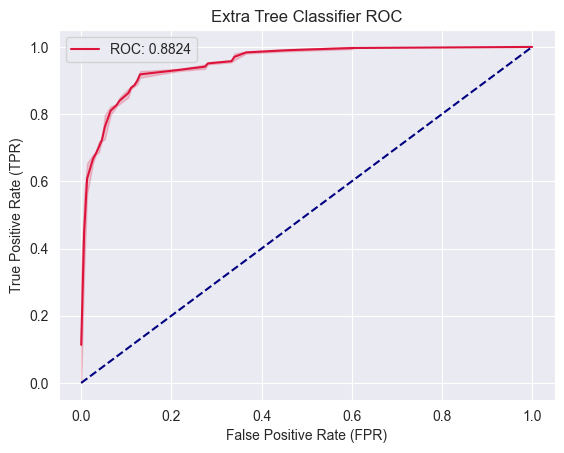

In [ ]:
# plot roc curve
sns.lineplot(x = etc_fpr, y = etc_tpr, color = "crimson", label = "ROC: {:.4f}".format(etc_roc_score))
sns.lineplot(x = [0, 1], y = [0, 1], color = "navy", linestyle = "--")
plt.title("Extra Tree Classifier ROC")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

#### (iv) SHAP Explainability

In [ ]:
explainer_etc = shap.Explainer(etc_gs.best_estimator_, X_train)
shap_values_etc = explainer_etc(X_train)

 96%|=================== | 2356/2444 [00:17<00:00]       

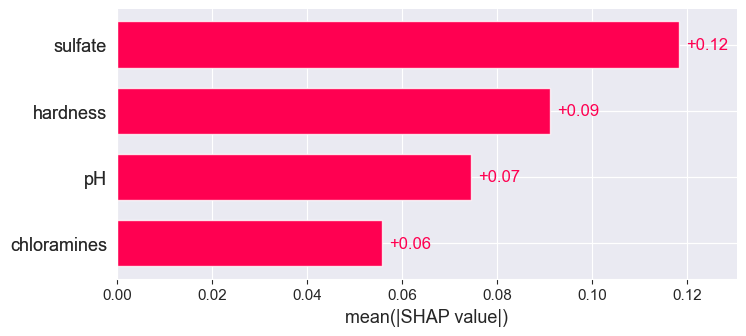

In [ ]:
shap.plots.bar(shap_values_etc[:, :, 1])

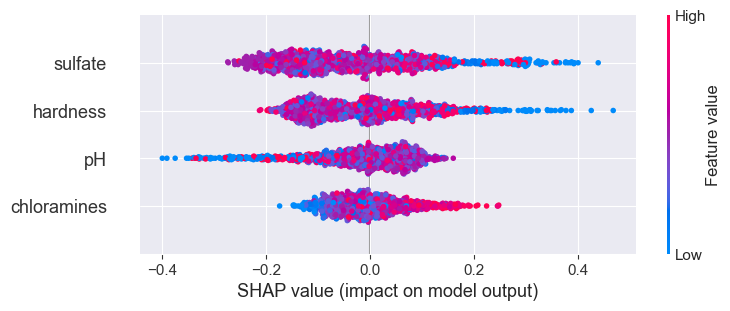

In [ ]:
shap.plots.beeswarm(shap_values_etc[:, :, 1])

### (C) Gradient Boosting Classifier

In [ ]:
# set params 
gbc_params = {'n_estimators': np.arange(10, 110, 10), 
              'criterion': ['friedman_mse', 'squared_error'],
              'min_samples_split': [2, 3, 4, 5], 
              'min_samples_leaf': [2, 3, 4, 5]}

# set grid search params
gbc_gs = GridSearchCV(estimator = GradientBoostingClassifier(random_state = 2025), 
                      param_grid = gbc_params, 
                      cv = cv, 
                      return_train_score = True, 
                      scoring = "accuracy", 
                      verbose = 3)

# fit the classifier
gbc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV 1/5] END criterion=friedman_mse, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.787, test=0.706) total time=   0.0s
[CV 2/5] END criterion=friedman_mse, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.765, test=0.739) total time=   0.0s
[CV 3/5] END criterion=friedman_mse, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.779, test=0.697) total time=   0.0s
[CV 4/5] END criterion=friedman_mse, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.762, test=0.742) total time=   0.0s
[CV 5/5] END criterion=friedman_mse, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=(train=0.759, test=0.721) total time=   0.0s
[CV 1/5] END criterion=friedman_mse, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=(train=0.797, test=0.698) total time=   0.0s
[CV 2/5] END criterion=friedman_mse, min_samples_leaf=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=2025),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# display the best params and scores
print("The best hyperparameters: {}".format(gbc_gs.best_estimator_))
print("The best score: {:.4f}".format(gbc_gs.best_score_))

The best hyperparameters: GradientBoostingClassifier(min_samples_leaf=5, n_estimators=np.int64(80),
                           random_state=2025)
The best score: 0.8126


#### (i) Classification Report

In [ ]:
# perform prediction on test data
gbc_test_pred = gbc_gs.predict(X_test)

In [ ]:
# display classification report
print(classification_report(y_test, gbc_test_pred))

              precision    recall  f1-score   support

 not_potable       0.76      0.82      0.79       153
     potable       0.81      0.75      0.78       153

    accuracy                           0.78       306
   macro avg       0.79      0.78      0.78       306
weighted avg       0.79      0.78      0.78       306



#### (ii) Confusion Matrix

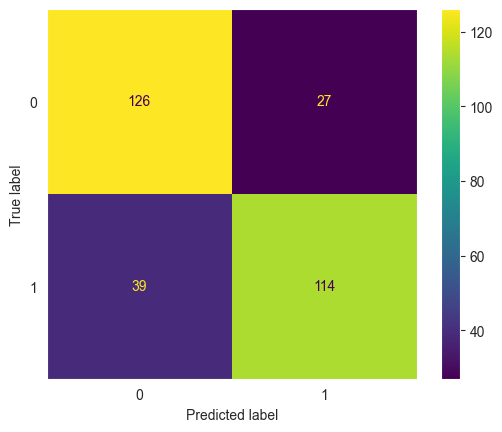

In [ ]:
# display confusion matrix 
gbc_cm = confusion_matrix(y_test, gbc_test_pred)
gbc_cmPlot = ConfusionMatrixDisplay(gbc_cm)
gbc_cmPlot.plot()
plt.grid(False)
plt.show()

#### (iii) ROC-AUC Curve

In [ ]:
# roc curve
gbc_prob = gbc_gs.predict_proba(X_test)[:, 1]
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc_prob, pos_label = "potable")

In [ ]:
# roc score
y_test_num = np.where(y_test == "potable", 1, 0)
gbc_test_pred_num = np.where(gbc_test_pred == "potable", 1, 0)
gbc_roc_score = roc_auc_score(y_test_num, gbc_test_pred_num)

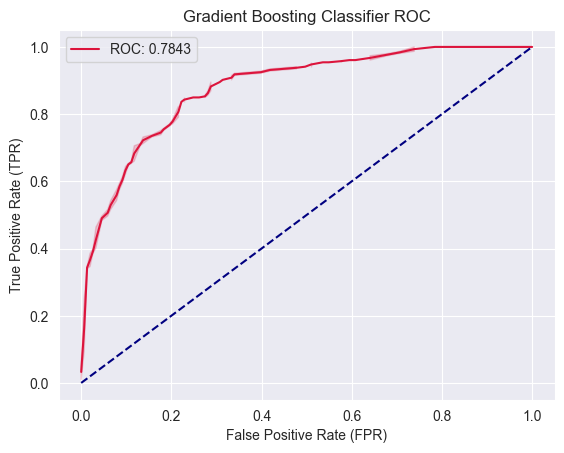

In [ ]:
# plot roc curve
sns.lineplot(x = gbc_fpr, y = gbc_tpr, color = "crimson", label = "ROC: {:.4f}".format(gbc_roc_score))
sns.lineplot(x = [0, 1], y = [0, 1], color = "navy", linestyle = "--")
plt.title("Gradient Boosting Classifier ROC")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

#### (iv) SHAP Explainability

In [ ]:
explainer_gbc = shap.Explainer(gbc_gs.best_estimator_, X_train)
shap_values_gbc = explainer_gbc(X_train)

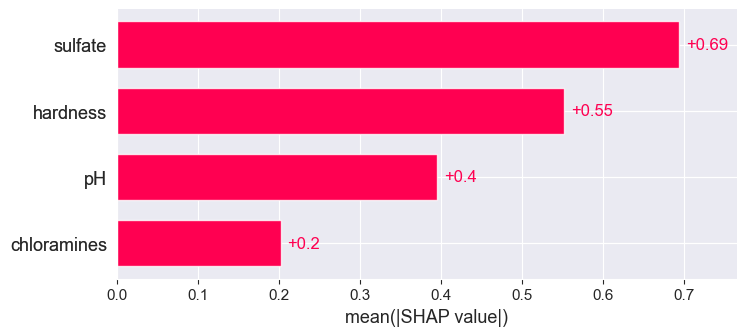

In [ ]:
shap.plots.bar(shap_values_gbc)

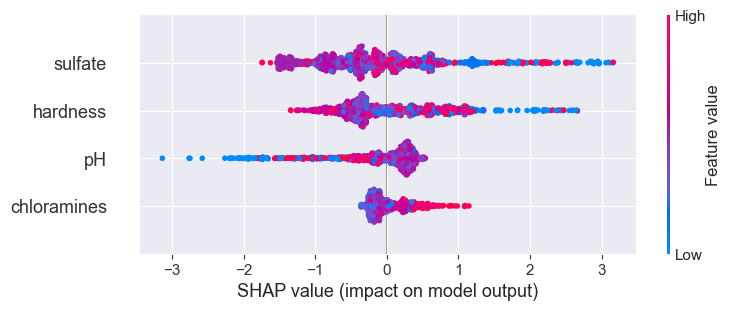

In [ ]:
shap.plots.beeswarm(shap_values_gbc)

### (D) Hist Gradient Boosting Classifier

In [ ]:
# set params 
hgbc_params = {'max_iter': np.arange(10, 110, 10), 
              'learning_rate': [1, 0.1, 0.01, 0.001],
              'min_samples_leaf': [2, 3, 4, 5]}

# set grid search params
hgbc_gs = GridSearchCV(estimator = HistGradientBoostingClassifier(random_state = 2025), 
                      param_grid = hgbc_params, 
                      cv = cv, 
                      return_train_score = True, 
                      scoring = "accuracy", 
                      verbose = 3)

# fit the classifier
hgbc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END learning_rate=1, max_iter=10, min_samples_leaf=2;, score=(train=1.000, test=0.833) total time=   0.1s
[CV 2/5] END learning_rate=1, max_iter=10, min_samples_leaf=2;, score=(train=1.000, test=0.837) total time=   0.1s
[CV 3/5] END learning_rate=1, max_iter=10, min_samples_leaf=2;, score=(train=1.000, test=0.779) total time=   0.1s
[CV 4/5] END learning_rate=1, max_iter=10, min_samples_leaf=2;, score=(train=1.000, test=0.885) total time=   0.1s
[CV 5/5] END learning_rate=1, max_iter=10, min_samples_leaf=2;, score=(train=1.000, test=0.848) total time=   0.1s
[CV 1/5] END learning_rate=1, max_iter=10, min_samples_leaf=3;, score=(train=1.000, test=0.837) total time=   0.1s
[CV 2/5] END learning_rate=1, max_iter=10, min_samples_leaf=3;, score=(train=1.000, test=0.824) total time=   0.1s
[CV 3/5] END learning_rate=1, max_iter=10, min_samples_leaf=3;, score=(train=1.000, test=0.811) total time=   0.1s
[CV 4/5] END lear

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=HistGradientBoostingClassifier(random_state=2025),
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'max_iter': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                         'min_samples_leaf': [2, 3, 4, 5]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# display the best params and scores
print("The best hyperparameters: {}".format(hgbc_gs.best_estimator_))
print("The best score: {:.4f}".format(hgbc_gs.best_score_))

The best hyperparameters: HistGradientBoostingClassifier(max_iter=np.int64(100), min_samples_leaf=2,
                               random_state=2025)
The best score: 0.8732


#### (i) Classification Report

In [ ]:
# perform prediction on test data
hgbc_test_pred = hgbc_gs.predict(X_test)

In [ ]:
# display classification report
print(classification_report(y_test, hgbc_test_pred))

              precision    recall  f1-score   support

 not_potable       0.87      0.88      0.87       153
     potable       0.88      0.86      0.87       153

    accuracy                           0.87       306
   macro avg       0.87      0.87      0.87       306
weighted avg       0.87      0.87      0.87       306



#### (ii) Confusion Matrix

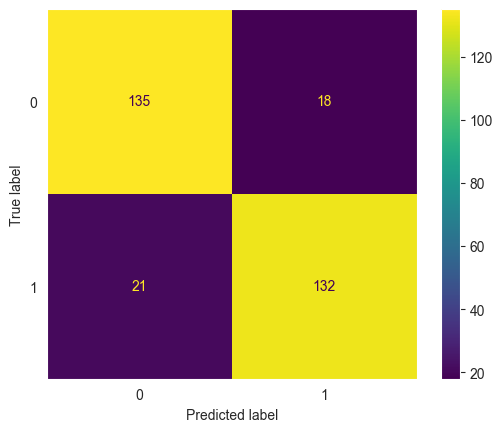

In [ ]:
# display confusion matrix 
hgbc_cm = confusion_matrix(y_test, hgbc_test_pred)
hgbc_cmPlot = ConfusionMatrixDisplay(hgbc_cm)
hgbc_cmPlot.plot()
plt.grid(False)
plt.show()

#### (iii) ROC-AUC Curve

In [ ]:
# roc curve
hgbc_prob = hgbc_gs.predict_proba(X_test)[:, 1]
hgbc_fpr, hgbc_tpr, hgbc_thresholds = roc_curve(y_test, hgbc_prob, pos_label = "potable")

In [ ]:
# roc score
y_test_num = np.where(y_test == "potable", 1, 0)
hgbc_test_pred_num = np.where(hgbc_test_pred == "potable", 1, 0)
hgbc_roc_score = roc_auc_score(y_test_num, hgbc_test_pred_num)

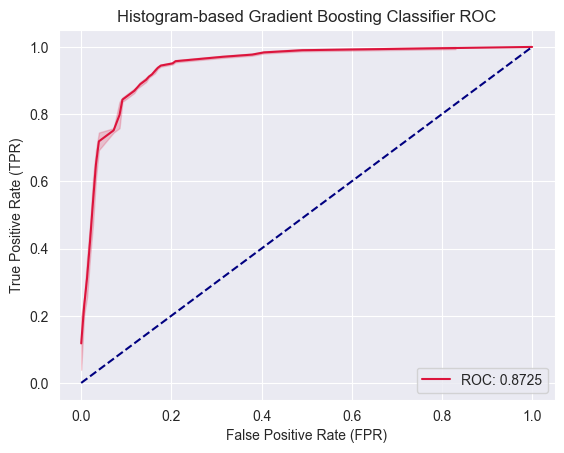

In [ ]:
# plot roc curve
sns.lineplot(x = hgbc_fpr, y = hgbc_tpr, color = "crimson", label = "ROC: {:.4f}".format(hgbc_roc_score))
sns.lineplot(x = [0, 1], y = [0, 1], color = "navy", linestyle = "--")
plt.title("Histogram-based Gradient Boosting Classifier ROC")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

#### (iv) SHAP Explainability

In [ ]:
explainer_hgbc = shap.Explainer(hgbc_gs.best_estimator_, X_train)
shap_values_hgbc = explainer_hgbc(X_train, check_additivity = False)

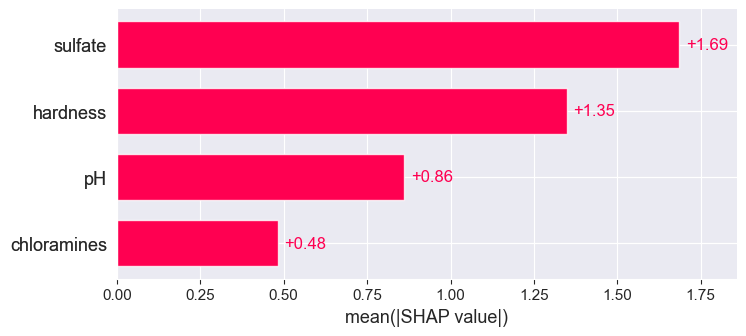

In [ ]:
shap.plots.bar(shap_values_hgbc)

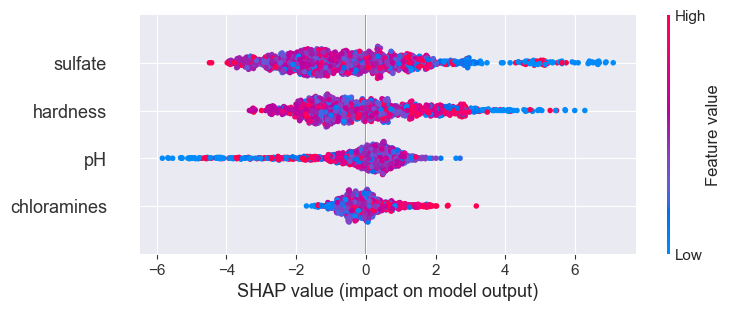

In [ ]:
shap.plots.beeswarm(shap_values_hgbc)

## 7. Save the Models

In [ ]:
import pickle 

with open("rfc_model.pkl", "wb") as model_file:
    pickle.dump(rfc_gs.best_estimator_, model_file)

with open("etc_model.pkl", "wb") as model_file:
    pickle.dump(etc_gs.best_estimator_, model_file)

with open("gbc_model.pkl", "wb") as model_file:
    pickle.dump(gbc_gs.best_estimator_, model_file)

with open("hgbc_model.pkl", "wb") as model_file:
    pickle.dump(hgbc_gs.best_estimator_, model_file)

In [ ]:
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)